In [3]:
# Install libraries used in the code
!pip install tensorflow
!pip install sklearn
!pip install torch
!pip install nltk

You should consider upgrading via the 'C:\Users\deepa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\deepa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\deepa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\deepa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: pip
    Found existing installation: pip 21.2.3
    Uninstalling pip-21.2.3:
      Successfully uninstalled pip-21.2.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\deepa\\AppData\\Local\\Temp\\pip-uninstall-0wjq0tff\\pip.exe'
Consider using the `--user` option or check the permissions.



# Dataset Preparation

In [2]:

import os


dataset_folder = r'C:\Users\deepa\OneDrive\Desktop\TextGCN_analysis-main\20 news dataset' 

# Define folders for train and test datasets
train_folder = os.path.join(dataset_folder, '20news-bydate-train')
test_folder = os.path.join(dataset_folder, '20news-bydate-test')

# Count the number of topics (subfolders) within the train and test folders
train_topics = os.listdir(train_folder)
test_topics = os.listdir(test_folder)

# Lists to store data and labels
original_train_sentences = []
original_labels_train = []
original_test_sentences = []
original_labels_test = []

# Load training data from subfolders
for topic_name in train_topics:
    topic_folder = os.path.join(train_folder, topic_name)
    
    # Iterate through text files in the topic folder
    for filename in os.listdir(topic_folder):
        file_path = os.path.join(topic_folder, filename)
        
        # Read the text from the file
        with open(file_path, 'r', encoding='us-ascii', errors='ignore') as file:
            text = file.read()
        
        original_train_sentences.append(text)
        original_labels_train.append(topic_name)

# Load testing data from subfolders
for topic_name in test_topics:
    topic_folder = os.path.join(test_folder, topic_name)
    
    # Iterate through text files in the topic folder
    for filename in os.listdir(topic_folder):
        file_path = os.path.join(topic_folder, filename)
        
        # Read the text from the file
        with open(file_path, 'r', encoding='us-ascii', errors='ignore') as file:
            text = file.read()
        
        original_test_sentences.append(text)
        original_labels_test.append(topic_name)

# Calculate train_size and test_size
train_size = len(original_train_sentences)
test_size = len(original_test_sentences)

# Combine training and testing sentences
sentences = original_train_sentences + original_test_sentences

# Print the first few samples to verify
for i in range(min(5, len(original_train_sentences))):
    print(f"Sample {i + 1} - Label: {original_labels_train[i]}")
    print(original_train_sentences[i])  # Print the text content
    print("-" * 50)


Sample 1 - Label: alt.atheism
From: mathew <mathew@mantis.co.uk>
Subject: Alt.Atheism FAQ: Atheist Resources
Summary: Books, addresses, music -- anything related to atheism
Keywords: FAQ, atheism, books, music, fiction, addresses, contacts
Expires: Thu, 29 Apr 1993 11:57:19 GMT
Distribution: world
Organization: Mantis Consultants, Cambridge. UK.
Supersedes: <19930301143317@mantis.co.uk>
Lines: 290

Archive-name: atheism/resources
Alt-atheism-archive-name: resources
Last-modified: 11 December 1992
Version: 1.0

                              Atheist Resources

                      Addresses of Atheist Organizations

                                     USA

FREEDOM FROM RELIGION FOUNDATION

Darwin fish bumper stickers and assorted other atheist paraphernalia are
available from the Freedom From Religion Foundation in the US.

Write to:  FFRF, P.O. Box 750, Madison, WI 53701.
Telephone: (608) 256-8900

EVOLUTION DESIGNS

Evolution Designs sell the "Darwin fish".  It's a fish symbol, like 

In [3]:
print(original_labels_train)

['alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.athe

# Hyper Parameters

In [4]:
EDGE = 2 # 0:d2w 1:d2w+w2w 2:d2w+w2w+d2d
NODE = 0 # 0:one-hot #1:BERT 
NUM_LAYERS = 2 

HIDDEN_DIM = 200
DROP_OUT = 0.5
LR = 0.02
WEIGHT_DECAY = 0
EARLY_STOPPING = 10
NUM_EPOCHS = 30

# Preprocess

## Label Encoding

In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

unique_labels=np.unique(original_labels_train)

num_class = len(unique_labels)
lEnc = LabelEncoder()
lEnc.fit(unique_labels)

print(unique_labels)
print(lEnc.transform(unique_labels))

train_labels = lEnc.transform(original_labels_train)
test_labels = lEnc.transform(original_labels_test)

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

labels = train_labels.tolist()+test_labels.tolist()
labels = torch.LongTensor(labels).to(device)

['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## Remove Stopwords and less frequent words, tokenize sentences

In [6]:
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
import nltk
import re

# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
remove_limit = 5


def clean_str(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

original_word_freq = {}  # to remove rare words
for sentence in sentences:
    temp = clean_str(sentence)
    word_list = temp.split()
    for word in word_list:
        if word in original_word_freq:
            original_word_freq[word] += 1
        else:
            original_word_freq[word] = 1   

tokenize_sentences = []
word_list_dict = {}
for sentence in sentences:
    temp = clean_str(sentence)
    word_list_temp = temp.split()
    doc_words = []
    for word in word_list_temp: 
        if word in original_word_freq and word not in stop_words and original_word_freq[word] >= remove_limit:
            doc_words.append(word)
            word_list_dict[word] = 1
    tokenize_sentences.append(doc_words)
word_list = list(word_list_dict.keys())
vocab_length = len(word_list)

#word to id dict
word_id_map = {}
for i in range(vocab_length):
    word_id_map[word_list[i]] = i 

# Print some of the resulting tokenized sentences
for i in range(min(5, len(tokenize_sentences))):
    print(f"Tokenized Sentence {i + 1}:")
    print(tokenize_sentences[i])
    print("-" * 50)

Tokenized Sentence 1:
['mathew', 'mathew', 'mantis', 'co', 'uk', 'subject', 'alt', 'atheism', 'faq', 'atheist', 'resources', 'summary', 'books', ',', 'addresses', ',', 'music', 'anything', 'related', 'atheism', 'keywords', 'faq', ',', 'atheism', ',', 'books', ',', 'music', ',', 'fiction', ',', 'addresses', ',', 'contacts', 'expires', 'thu', ',', '29', 'apr', '1993', '11', '57', '19', 'gmt', 'distribution', 'world', 'organization', 'mantis', 'consultants', ',', 'cambridge', 'uk', 'supersedes', 'mantis', 'co', 'uk', 'lines', '290', 'archive', 'name', 'atheism', 'resources', 'alt', 'atheism', 'archive', 'name', 'resources', 'last', 'modified', '11', 'december', '1992', 'version', '1', '0', 'atheist', 'resources', 'addresses', 'atheist', 'organizations', 'usa', 'freedom', 'religion', 'foundation', 'darwin', 'fish', 'bumper', 'stickers', 'assorted', 'atheist', 'paraphernalia', 'available', 'freedom', 'religion', 'foundation', 'us', 'write', ',', 'p', 'box', '750', ',', 'madison', ',', 'wi',

In [7]:
node_size = train_size + vocab_length + test_size

# Model input

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm

## Build Graph

In [9]:
from math import log
row = []
col = []
weight = []

### word-word: PMI

In [ ]:
if EDGE >= 1:
    window_size = 20
    total_W = 0
    word_occurrence = {}
    word_pair_occurrence = {}

    def ordered_word_pair(a, b):
        if a > b:
            return b, a
        else:
            return a, b

    def update_word_and_word_pair_occurrence(q):
        unique_q = list(set(q))
        for i in unique_q:
            try:
                word_occurrence[i] += 1
            except:
                word_occurrence[i] = 1
        for i in range(len(unique_q)):
            for j in range(i+1, len(unique_q)):
                word1 = unique_q[i]
                word2 = unique_q[j]
                word1, word2 = ordered_word_pair(word1, word2)
                try:
                    word_pair_occurrence[(word1, word2)] += 1
                except:
                    word_pair_occurrence[(word1, word2)] = 1


    for ind in tqdm(range(train_size+test_size)):
        words = tokenize_sentences[ind]

        q = []
        # push the first (window_size) words into a queue
        for i in range(min(window_size, len(words))):
            q += [word_id_map[words[i]]]
        # update the total number of the sliding windows
        total_W += 1
        # update the number of sliding windows that contain each word and word pair
        update_word_and_word_pair_occurrence(q)

        now_next_word_index = window_size
        # pop the first word out and let the next word in, keep doing this until the end of the document
        while now_next_word_index<len(words):
            q.pop(0)
            q += [word_id_map[words[now_next_word_index]]]
            now_next_word_index += 1
            # update the total number of the sliding windows
            total_W += 1
            # update the number of sliding windows that contain each word and word pair
            update_word_and_word_pair_occurrence(q)

    for word_pair in word_pair_occurrence:
        i = word_pair[0]
        j = word_pair[1]
        count = word_pair_occurrence[word_pair]
        word_freq_i = word_occurrence[i]
        word_freq_j = word_occurrence[j]
        pmi = log((count * total_W) / (word_freq_i * word_freq_j))
        if pmi <=0:
            continue
        row.append(train_size + i)
        col.append(train_size + j)
        weight.append(pmi)
        row.append(train_size + j)
        col.append(train_size + i)
        weight.append(pmi)


### doc-word: Tf-idf

In [ ]:
#get each word appears in which document
word_doc_list = {}
for word in word_list:
    word_doc_list[word]=[]

for i in range(len(tokenize_sentences)):
    doc_words = tokenize_sentences[i]
    unique_words = set(doc_words)
    for word in unique_words:
        exsit_list = word_doc_list[word]
        exsit_list.append(i)
        word_doc_list[word] = exsit_list

#document frequency
word_doc_freq = {}
for word, doc_list in word_doc_list.items():
    word_doc_freq[word] = len(doc_list)

# term frequency
doc_word_freq = {}

for doc_id in range(len(tokenize_sentences)):
    words = tokenize_sentences[doc_id]
    for word in words:
        word_id = word_id_map[word]
        doc_word_str = str(doc_id) + ',' + str(word_id)
        if doc_word_str in doc_word_freq:
            doc_word_freq[doc_word_str] += 1
        else:
            doc_word_freq[doc_word_str] = 1

In [11]:
for i in range(len(tokenize_sentences)):
    words = tokenize_sentences[i]
    doc_word_set = set()
    for word in words:
        if word in doc_word_set:
            continue
        j = word_id_map[word]
        key = str(i) + ',' + str(j)
        freq = doc_word_freq[key]
        if i < train_size:
            row.append(i)
        else:
            row.append(i + vocab_length)
        col.append(train_size + j)
        idf = log(1.0 * len(tokenize_sentences) / word_doc_freq[word_list[j]])
        weight.append(freq * idf)
        doc_word_set.add(word)

### doc-doc: jaccard

In [12]:
if EDGE >= 2:
    tokenize_sentences_set = [set(s) for s in tokenize_sentences]
    jaccard_threshold = 0.2
    
    for i in tqdm(range(len(tokenize_sentences))):
        for j in range(i + 1, len(tokenize_sentences)):
            # Calculating the sizes of the sets
            set_i_size = len(tokenize_sentences_set[i])
            set_j_size = len(tokenize_sentences_set[j])
            intersect_size = len(tokenize_sentences_set[i].intersection(tokenize_sentences_set[j]))
            
            # Modified Jaccard Similarity Measure (MJSM) calculation
            jaccard_w = intersect_size / ((set_i_size + set_j_size) - intersect_size)
            
            if jaccard_w > jaccard_threshold:
                if i < train_size:
                    row.append(i)
                else:
                    row.append(i + vocab_length)
                if j < train_size:
                    col.append(j)
                else:
                    col.append(vocab_length + j)
                weight.append(jaccard_w)
                
                if j < train_size:
                    row.append(j)
                else:
                    row.append(j + vocab_length)
                if i < train_size:
                    col.append(i)
                else:
                    col.append(vocab_length + i)
                weight.append(jaccard_w)



# import nltk

# if EDGE>=2:
#     tokenize_sentences_set = [set(s) for s in tokenize_sentences]
#     jaccard_threshold = 0.2
#     for i in tqdm(range(len(tokenize_sentences))):
#         for j in range(i+1, len(tokenize_sentences)):
#             jaccard_w = 1 - nltk.jaccard_distance(tokenize_sentences_set[i], tokenize_sentences_set[j])
#             if jaccard_w > jaccard_threshold:
#                 if i < train_size:
#                     row.append(i)
#                 else:
#                     row.append(i + vocab_length)
#                 if j < train_size:
#                     col.append(j)
#                 else:
#                     col.append(vocab_length + j)
#                 weight.append(jaccard_w)
#                 if j < train_size:
#                     row.append(j)
#                 else:
#                     row.append(j + vocab_length)
#                 if i < train_size:
#                     col.append(i)
#                 else:
#                     col.append(vocab_length + i)
#                 weight.append(jaccard_w)


  0%|          | 0/18846 [00:00<?, ?it/s]

### saving graph info

In [13]:
import csv

data = list(zip(row, col, weight))

with open('jaccard_weights_new.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(data)


### repopulating the matrix so we dont have to calculate jaccard weights again

In [10]:
import csv

# Initialize lists to store data
row = []
col = []
weight = []

csv_file_path = 'jaccard_weights_new.csv'

# Read the data from the CSV file
with open(csv_file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row_data in csvreader:
        row.append(int(row_data[0]))  
        col.append(int(row_data[1]))  
        weight.append(float(row_data[2])) 


In [11]:
import pandas as pd

data = {'Row': row[:10], 'Column': col[:10], 'Weight': weight[:10]}
df = pd.DataFrame(data)
print(df)

# num_rows = len(df)  # Using len() function
# print("Number of rows:", num_rows)


     Row  Column    Weight
0  11314   11315  6.922604
1  11315   11314  6.922604
2  11314   11316  4.628968
3  11316   11314  4.628968
4  11314   11317  4.178447
5  11317   11314  4.178447
6  11314   11318  0.553881
7  11318   11314  0.553881
8  11314   11319  2.327500
9  11319   11314  2.327500


## Adjacent matrix

In [12]:
import scipy.sparse as sp
adj = sp.csr_matrix((weight, (row, col)), shape=(node_size, node_size))

# build symmetric adjacency matrix
adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)

In [13]:
def normalize_adj(adj):
    """Symmetrically normalize adjacency matrix."""
    adj = sp.coo_matrix(adj)
    rowsum = np.array(adj.sum(1))
    d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    return adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt).tocoo(), d_inv_sqrt
    
adj, norm_item = normalize_adj(adj + sp.eye(adj.shape[0]))


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape).to(device)

adj = sparse_mx_to_torch_sparse_tensor(adj)

C:\Users\deepa\AppData\Local\Temp\ipykernel_8184\3533750465.py:20: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:607.)
  return torch.sparse.FloatTensor(indices, values, shape).to(device)


## Features

In [14]:
if NODE == 0:
    features = np.arange(node_size)
    features = torch.FloatTensor(features).to(device)
else:
    
    from flair.embeddings import TransformerDocumentEmbeddings, TransformerWordEmbeddings
    from flair.data import Sentence
    doc_embedding = TransformerDocumentEmbeddings('bert-base-uncased', fine_tune=False)
    word_embedding = TransformerWordEmbeddings('bert-base-uncased', layers='-1',subtoken_pooling="mean")

    sent_embs = []
    word_embs = {}

    for ind in tqdm(range(train_size+test_size)):
        sent = tokenize_sentences[ind]
        sentence = Sentence(" ".join(sent[:512]),use_tokenizer=False)
        doc_embedding.embed(sentence)
        sent_embs.append(sentence.get_embedding().tolist())
        words = Sentence(" ".join(sent[:512]),use_tokenizer=False)
        word_embedding.embed(words)
        for token in words:
            word = token.text
            embedding = token.embedding.tolist()
            if word not in word_embs:
                word_embs[word] = embedding
            else:
                word_embs[word] = np.minimum(word_embs[word], embedding)

    word_embs_list = []
    for word in word_list:
        word_embs_list.append(word_embs[word])

    features = sent_embs[:train_size] + word_embs_list + sent_embs[train_size:]

    import scipy.sparse as sp
    def preprocess_features(features):
        """Row-normalize feature matrix and convert to tuple representation"""
        rowsum = np.array(features.sum(1))
        r_inv = np.power(rowsum, -1).flatten()
        r_inv[np.isinf(r_inv)] = 0.
        r_mat_inv = sp.diags(r_inv)
        features = r_mat_inv.dot(features)
        return features

    features = preprocess_features(sp.csr_matrix(features)).todense()
    features = torch.FloatTensor(features).to(device)

# Model

## GCN Layer

In [15]:
import math

import torch

from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module


class GraphConvolution(Module):

    def __init__(self, in_features, out_features,  drop_out = 0, activation=None, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.zeros(1, out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters(in_features, out_features)
        self.dropout = torch.nn.Dropout(drop_out)
        self.activation =  activation

    def reset_parameters(self,in_features, out_features):
        stdv = np.sqrt(6.0/(in_features+out_features))
        # stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        # if self.bias is not None:
        #     torch.nn.init.zeros_(self.bias)
            # self.bias.data.uniform_(-stdv, stdv)


    def forward(self, input, adj, feature_less = False):
        if feature_less:
            support = self.weight
            support = self.dropout(support)
        else:
            input = self.dropout(input)
            support = torch.mm(input, self.weight)
        output = torch.spmm(adj, support)
        if self.bias is not None:
            output = output + self.bias
        if self.activation is not None:
            output = self.activation(output)
        return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'

## GCN Model

## gumbel function

In [25]:
import torch
import torch.nn.functional as F

def gumbel_softmax(logits, temperature=1.0, hard=False, eps=1e-20, dim=-1):
    gumbel_dist = torch.distributions.gumbel.Gumbel(0, 1).sample(logits.size()).to(logits.device)
    y = logits + gumbel_dist
    y = F.softmax(y / temperature, dim=dim)
    
    if hard:
        # Hard Gumbel Softmax
        y_hard = torch.zeros_like(y, dtype=torch.float32)
        y_hard.scatter_(dim, y.argmax(dim, keepdim=True), 1.0)
        y = (y_hard - y).detach() + y

    return y


In [26]:
import torch.nn as nn
# import torch.nn.functional as F

# class GCN(nn.Module):
#     def __init__(self, nfeat, nhid, nclass, dropout, n_layers = 2):
#         super(GCN, self).__init__()
#         self.n_layers = n_layers
#         self.gc_list = []
#         if n_layers >= 2:
#             self.gc1 = GraphConvolution(nfeat, nhid, dropout, activation = nn.ReLU())
#             self.gc_list = nn.ModuleList([GraphConvolution(nhid, nhid, dropout, activation = nn.ReLU()) for _ in range(self.n_layers-2)])
#             self.gcf = GraphConvolution(nhid, nclass, dropout)
#         else:
#             self.gc1 = GraphConvolution(nfeat, nclass, dropout)

#     def forward(self, x, adj):
#         if self.n_layers>=2:
#             x = self.gc1(x, adj, feature_less = True)
#             for i in range(self.n_layers-2):
#                 x = self.gc_list[i](x,adj)
#             x = self.gcf(x,adj)
#         else:
#             x = self.gc1(x, adj, feature_less = True)
#         return x

# import torch.nn.functional as F

# class GCN(nn.Module):
#     def __init__(self, nfeat, nhid, nclass, dropout, n_layers=2):
#         super(GCN, self).__init__()
#         self.n_layers = n_layers
#         self.gc_list = []
#         if n_layers >= 2:
#             self.gc1 = GraphConvolution(nfeat, nhid, dropout, activation=nn.ReLU())
#             self.gc_list = nn.ModuleList([GraphConvolution(nhid, nhid, dropout, activation=nn.ReLU()) for _ in range(self.n_layers - 2)])
#             self.gcf = GraphConvolution(nhid, nclass, dropout, activation=None)  # No activation for the final layer
#         else:
#             self.gc1 = GraphConvolution(nfeat, nclass, dropout, activation=None)  # No activation for single layer

#     def forward(self, x, adj):
#         if self.n_layers >= 2:
#             x = self.gc1(x, adj, feature_less=True)
#             for i in range(self.n_layers - 2):
#                 x = self.gc_list[i](x, adj)
#             x = self.gcf(x, adj)
#             x = F.softmax(x, dim=1)  # Applying softmax activation to the final layer output
#         else:
#             x = self.gc1(x, adj, feature_less=True)
#             x = F.softmax(x, dim=1)  # Applying softmax activation to the output of the single layer
#         return x

import torch.nn.functional as F

class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout, n_layers=2):
        super(GCN, self).__init__()
        self.n_layers = n_layers
        self.gc_list = []
        if n_layers >= 2:
            self.gc1 = GraphConvolution(nfeat, nhid, dropout, activation=nn.ReLU())
            self.gc_list = nn.ModuleList([GraphConvolution(nhid, nhid, dropout, activation=nn.ReLU()) for _ in range(self.n_layers - 2)])
            self.gcf = GraphConvolution(nhid, nclass, dropout, activation=None)  # No activation for the final layer
        else:
            self.gc1 = GraphConvolution(nfeat, nclass, dropout, activation=None)  # No activation for single layer

    def forward(self, x, adj):
        if self.n_layers >= 2:
            x = self.gc1(x, adj, feature_less=True)
            for i in range(self.n_layers - 2):
                x = self.gc_list[i](x, adj)
            x = self.gcf(x, adj)
            # Applying Gumbel Softmax instead of regular softmax
            x = gumbel_softmax(x, dim=1, hard=True)  
        else:
            x = self.gc1(x, adj, feature_less=True)
            # Applying Gumbel Softmax instead of regular softmax
            x = gumbel_softmax(x, dim=1, hard=True)  
        return x


In [27]:
def cal_accuracy(predictions,labels):
    pred = torch.argmax(predictions,-1).cpu().tolist()
    lab = labels.cpu().tolist()
    cor = 0
    for i in range(len(pred)):
        if pred[i] == lab[i]:
            cor += 1
    return cor/len(pred)

# Training

## Initialize model

In [28]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss()

model = GCN(nfeat=node_size, nhid=HIDDEN_DIM, nclass=num_class, dropout=DROP_OUT,n_layers=NUM_LAYERS).to(device)
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

## Training and Validating

In [29]:
def generate_train_val(train_pro=0.9):
    real_train_size = int(train_pro*train_size)
    val_size = train_size-real_train_size

    idx_train = np.random.choice(train_size, real_train_size,replace=False)
    idx_train.sort()
    idx_val = []
    pointer = 0
    for v in range(train_size):
        if pointer<len(idx_train) and idx_train[pointer] == v:
            pointer +=1
        else:
            idx_val.append(v)
    idx_test = range(train_size+vocab_length, node_size)
    return idx_train, idx_val, idx_test

idx_train, idx_val, idx_test = generate_train_val()

In [30]:
import time

NUM_EPOCHS=90

def train_model(show_result = True):
    val_loss = []
    for epoch in range(NUM_EPOCHS):
        t = time.time()
        model.train()
        optimizer.zero_grad()
        output= model(features, adj)
        loss_train = criterion(output[idx_train], labels[idx_train])
        acc_train = cal_accuracy(output[idx_train], labels[idx_train])
        loss_train.backward()
        optimizer.step()

        model.eval()
        output = model(features, adj)

        loss_val = criterion(output[idx_val], labels[idx_val])
        val_loss.append(loss_val.item())
        acc_val = cal_accuracy(output[idx_val], labels[idx_val])
        
        if epoch % 20 == 0:  # Save model every 'save_every' epochs
           torch.save(model, 'entire_model.pth')

        if show_result:
            print(  'Epoch: {:04d}'.format(epoch+1),
                    'loss_train: {:.4f}'.format(loss_train.item()),
                    'acc_train: {:.4f}'.format(acc_train),
                    'loss_val: {:.4f}'.format(loss_val.item()),
                    'acc_val: {:.4f}'.format(acc_val),
                    'time: {:.4f}s'.format(time.time() - t))
        
        if epoch > EARLY_STOPPING and np.min(val_loss[-EARLY_STOPPING:]) > np.min(val_loss[:-EARLY_STOPPING]) :
            if show_result:
                print("Early Stopping...")
            break

train_model()

Epoch: 0001 loss_train: 3.0299 acc_train: 0.0482 loss_val: 3.0181 acc_val: 0.0601 time: 40.4898s
Epoch: 0002 loss_train: 3.0263 acc_train: 0.0519 loss_val: 3.0313 acc_val: 0.0468 time: 64.0122s
Epoch: 0003 loss_train: 3.0278 acc_train: 0.0504 loss_val: 3.0349 acc_val: 0.0433 time: 65.0024s
Epoch: 0004 loss_train: 3.0233 acc_train: 0.0549 loss_val: 3.0331 acc_val: 0.0451 time: 64.8204s
Epoch: 0005 loss_train: 3.0229 acc_train: 0.0553 loss_val: 3.0225 acc_val: 0.0557 time: 65.3151s
Epoch: 0006 loss_train: 3.0250 acc_train: 0.0531 loss_val: 3.0419 acc_val: 0.0362 time: 67.5186s
Epoch: 0007 loss_train: 3.0241 acc_train: 0.0540 loss_val: 3.0313 acc_val: 0.0468 time: 67.1114s
Epoch: 0008 loss_train: 3.0192 acc_train: 0.0589 loss_val: 3.0199 acc_val: 0.0583 time: 61.5194s
Epoch: 0009 loss_train: 3.0183 acc_train: 0.0598 loss_val: 3.0181 acc_val: 0.0601 time: 60.9421s
Epoch: 0010 loss_train: 3.0180 acc_train: 0.0602 loss_val: 3.0190 acc_val: 0.0592 time: 66.0381s
Epoch: 0011 loss_train: 3.0167

## Evaluation

In [31]:
# from sklearn.metrics import f1_score, accuracy_score
# def test():
#     model.eval()
#     output = model(features, adj)
#     predictions = torch.argmax(output[idx_test],-1).cpu().tolist()
#     acc = accuracy_score(test_labels,predictions)
#     f11 = f1_score(test_labels,predictions, average='macro')
#     f12 = f1_score(test_labels,predictions, average = 'weighted')
#     return acc, f11, f12

# print(test())

from sklearn.metrics import f1_score, accuracy_score

def test():
    model.eval()
    output = model(features, adj)
    predictions = torch.argmax(output[idx_test], -1).cpu().tolist()
    acc = accuracy_score(test_labels, predictions)
    f11 = f1_score(test_labels, predictions, average='macro')
    f12 = f1_score(test_labels, predictions, average='weighted')
    return acc, f11, f12, predictions  # Include predictions in the returned values

acc, f11, f12, predicted_labels = test()
print("Accuracy:", acc)
print("Macro F1 Score:", f11)
print("Weighted F1 Score:", f12)


Accuracy: 0.7096388741370154
Macro F1 Score: 0.6429294199910794
Weighted F1 Score: 0.6684722024538696


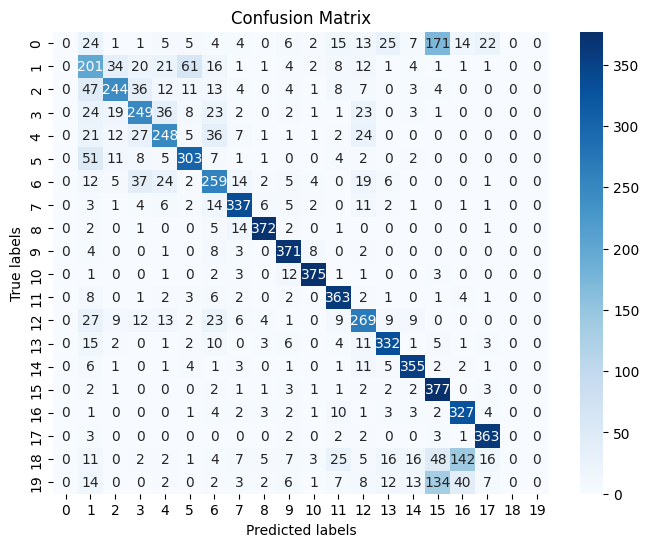

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## sample outputs

In [ ]:
import random

label_to_topic = {
    0: 'alt.atheism', 1: 'comp.graphics', 2: 'comp.os.ms-windows.misc',
    3: 'comp.sys.ibm.pc.hardware', 4: 'comp.sys.mac.hardware', 5: 'comp.windows.x',
    6: 'misc.forsale', 7: 'rec.autos', 8: 'rec.motorcycles', 9: 'rec.sport.baseball',
    10: 'rec.sport.hockey', 11: 'sci.crypt', 12: 'sci.electronics', 13: 'sci.med',
    14: 'sci.space', 15: 'soc.religion.christian', 16: 'talk.politics.guns',
    17: 'talk.politics.mideast', 18: 'talk.politics.misc', 19: 'talk.religion.misc'
}

# Create a list of indices to sample randomly
sample_indices = random.sample(range(len(predicted_labels)), min(1000, len(predicted_labels)))

# Display predicted topics against actual topics and sentences for the sampled indices
for i in sample_indices:
    print(f"Sample {i + 1}")
    print("Predicted Topic:", label_to_topic[predicted_labels[i]])  # Mapping predicted label to topic
    print("True Topic:", label_to_topic[test_labels[i]])  # Mapping true label to topic
    print(original_test_sentences[i])  # The text content of the sentence from the test set
    print("-" * 50)